## 0. Importing external modules

In [1]:
## path for modules

import sys
import glob
import numpy as np
import netCDF4
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.ma as ma

sys.path.insert(0,'/mnt/meom/workdir/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

%matplotlib inline


In [2]:
## modules version

print 'numpy : ',np.__version__
print 'xarray : ',xr.__version__
print 'netCDF4 : ',netCDF4.__version__
print 'matplotlib : ',matplotlib.__version__


numpy :  1.14.2
xarray :  0.10.2
netCDF4 :  1.3.1
matplotlib :  2.2.2


# Loading daily outputs of product of filtered buoyancy and vertical velocities for march and september 2013

In [3]:
database = '/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/'


## 2. Defining the computation in boxes

In [4]:
def wb_boxes(month):
    global boxes
    _Ann_wb_arr = []

    for box in boxes:
        name=box.name
        print name
        nb=name[4:]
        wbuoyfiles = sorted(glob.glob(database + 'filt-3D/NATL60box'+nb+'-CJM165_y2013m'+month+'d*.1d_wbuoy_filt-n80-f0.0125.nc'))
        _wb_arr=[]
        for i in range(len(wbuoyfiles)): 
            wbuoy = xr.open_dataset(wbuoyfiles[i])['wbuoy']
            truc=np.nanmean(wbuoy,axis=3)
            trucb=np.nanmean(truc, axis=2)
            avg_wb_box = np.squeeze(trucb)
            _wb_arr.append(avg_wb_box)
        wb_arr = np.array(_wb_arr)
        _Ann_wb_arr.append(wb_arr)
    Ann_wb_arr=np.array(_Ann_wb_arr)
    return Ann_wb_arr


In [5]:
wb_box_march = wb_boxes('03')
wb_box_sept = wb_boxes('09')


Box_14
Box_13
Box_12
Box_11
Box_10
Box_7
Box_6
Box_5
Box_4
Box_3
Box_2
Box_1
Box_9
Box_8
Box_14
Box_13
Box_12
Box_11
Box_10
Box_7
Box_6
Box_5
Box_4
Box_3
Box_2
Box_1
Box_9
Box_8


In [8]:
def mld_boxes(month):
    global boxes
    _Ann_mld_arr = []

    for box in boxes:
        name=box.name
        print name
        nb=name[4:]
        mldfiles = sorted(glob.glob(database + 'MXL/NATL60box'+nb+'-CJM165_y2013m'+month+'d*.1d_somxl010.nc'))
        _mld_arr=[]
        for i in range(len(mldfiles)): 
            mld = xr.open_dataset(mldfiles[i])['somxl010']
            avg_mld_box = np.nanmean(mld)
            _mld_arr.append(avg_mld_box)
        mld_arr = np.array(_mld_arr)
        _Ann_mld_arr.append(mld_arr)
    Ann_mld_arr=np.array(_Ann_mld_arr)
    return Ann_mld_arr


In [9]:
mld_box_march = mld_boxes('03')
mld_box_sept = mld_boxes('09')


Box_14
Box_13
Box_12
Box_11
Box_10
Box_7
Box_6
Box_5
Box_4
Box_3
Box_2
Box_1
Box_9
Box_8
Box_14
Box_13
Box_12
Box_11
Box_10
Box_7
Box_6
Box_5
Box_4
Box_3
Box_2
Box_1
Box_9
Box_8


In [16]:
wb_box_march.shape

(14, 31, 139)

In [12]:
march_wbuoyfile = database + 'filt-3D/NATL60box1-CJM165_y2013m03d01.1d_wbuoy_filt-n80-f0.0125.nc'
dep_march=xr.open_dataset(march_wbuoyfile)['deptht']    

In [15]:
dep_march.shape

(139,)

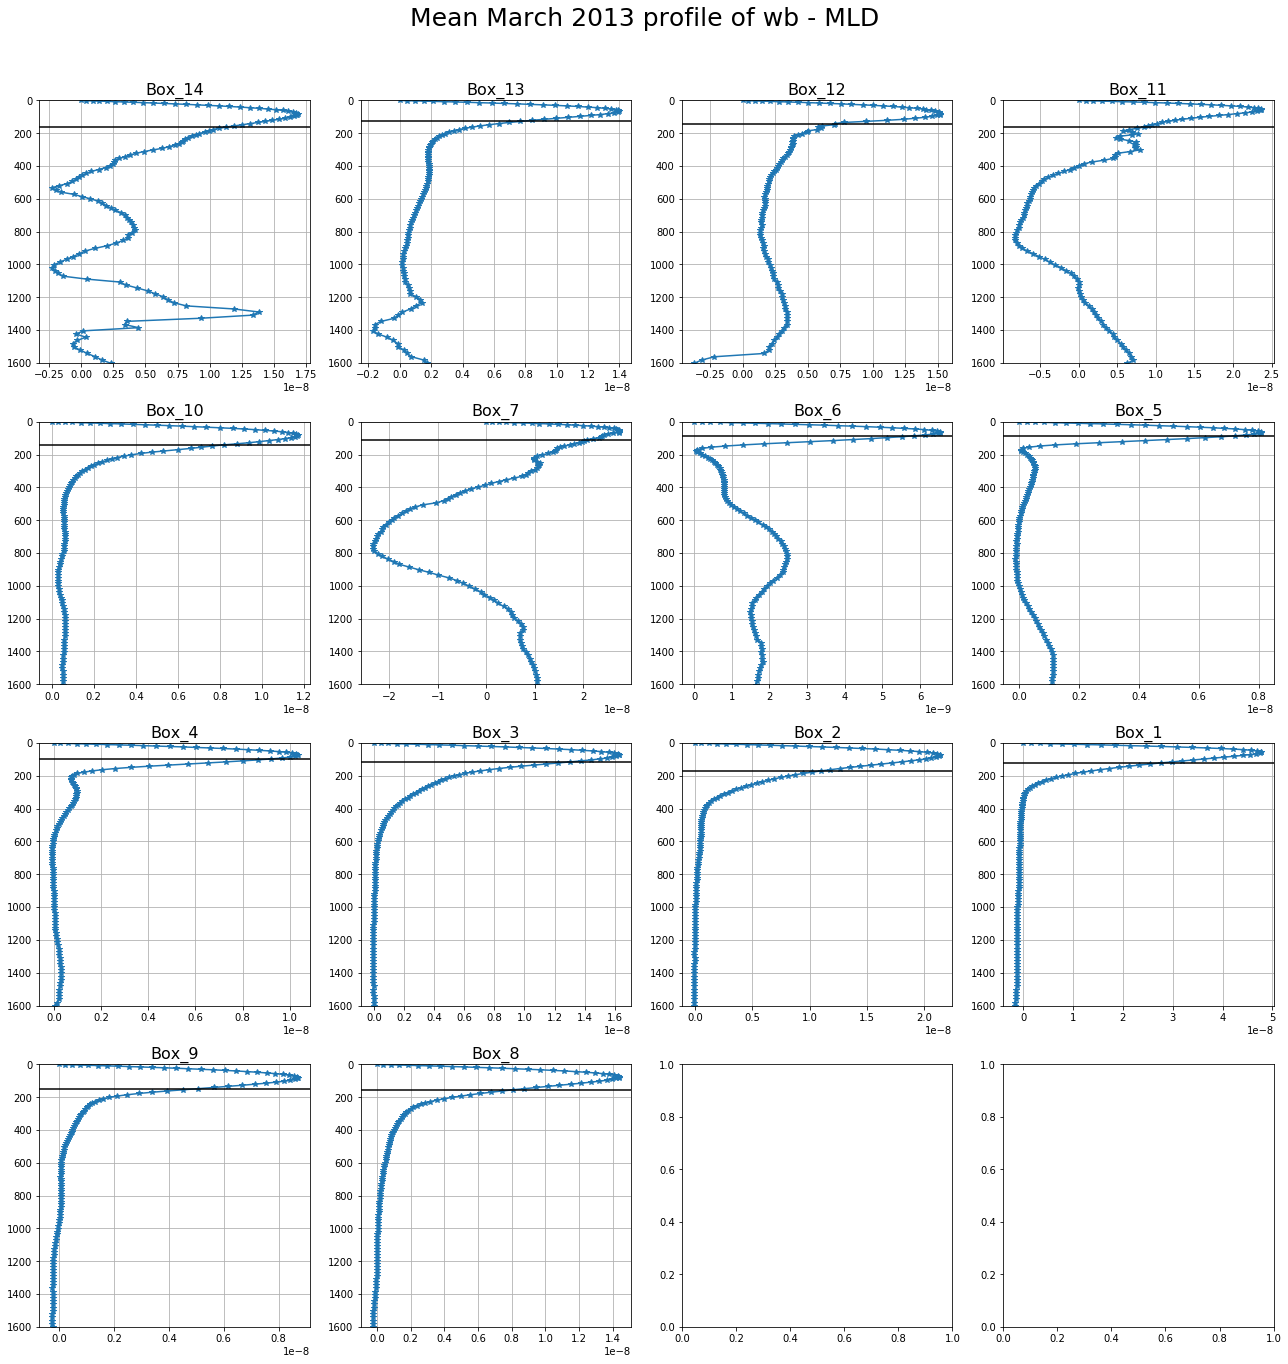

In [18]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Mean March 2013 profile of wb - MLD'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(np.nanmean(wb_box_march[k,:,:],0),dep_march,'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(1600,0)
    axs[i].axhline(y=np.nanmean(mld_box_march[k,:]),color='k')
    i = i + 1
    fig.tight_layout()
    
plt.savefig("NATL60_wb_profiles_march13_surf_from_boxes.png")

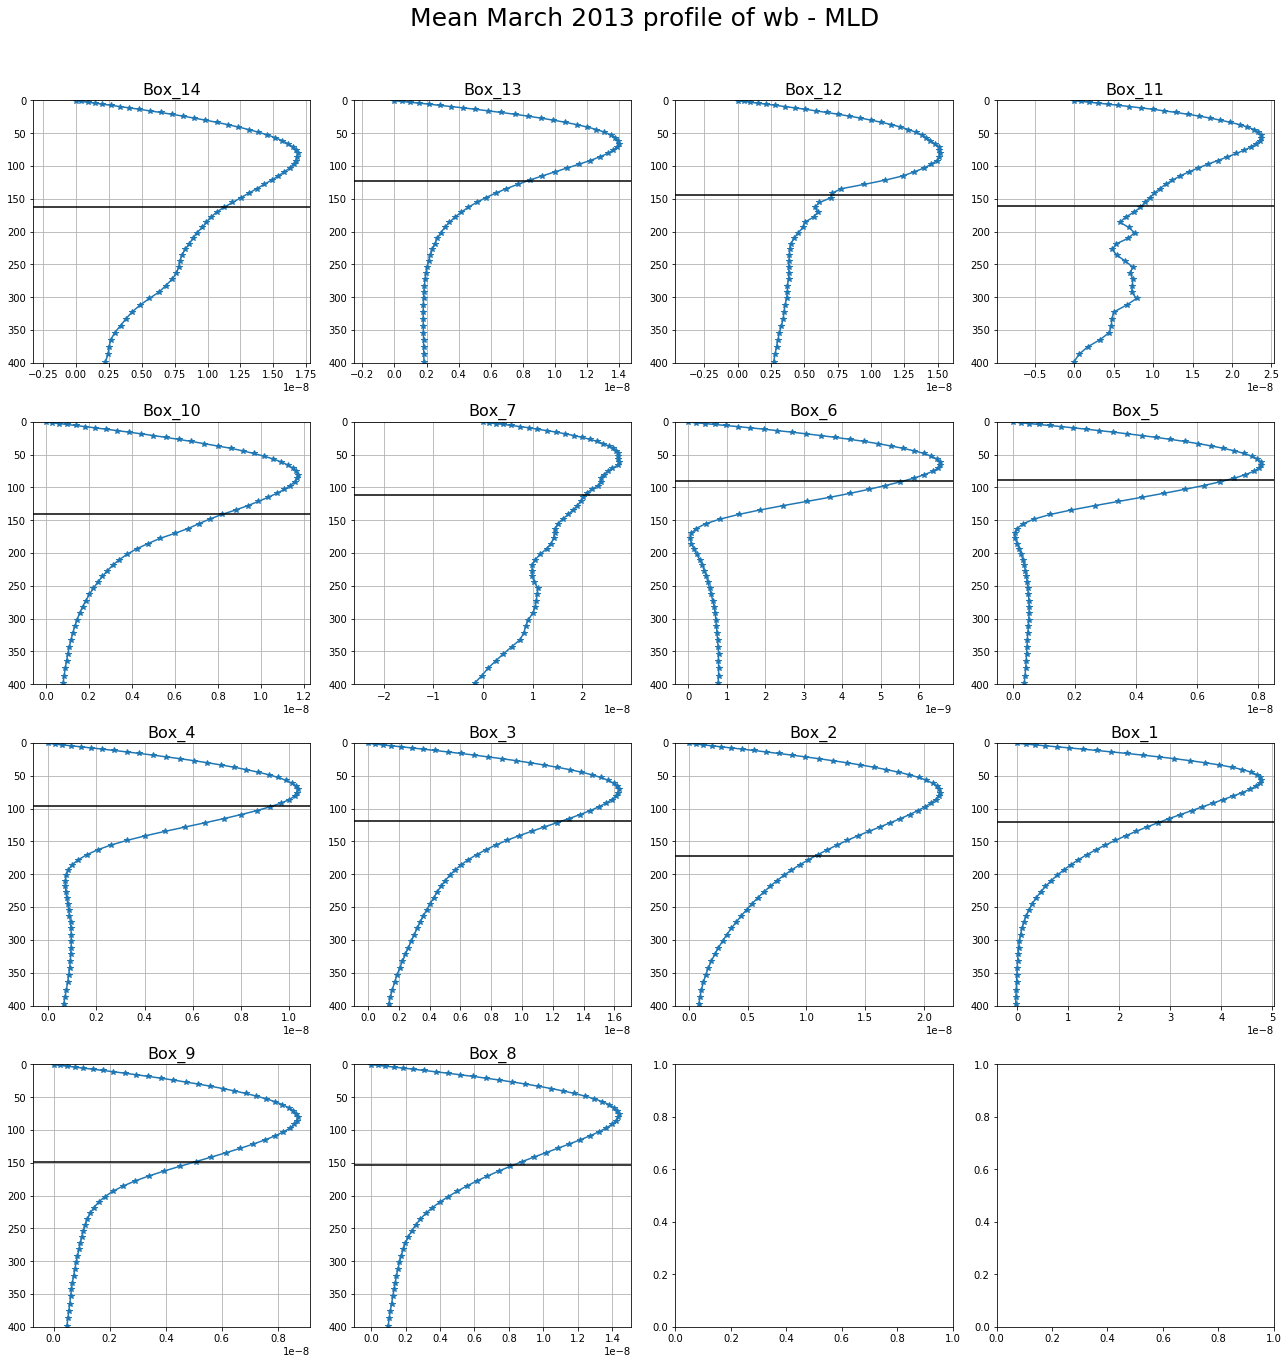

In [17]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Mean March 2013 profile of wb - MLD'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(np.nanmean(wb_box_march[k,:,:],0),dep_march,'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(400,0)
    axs[i].axhline(y=np.nanmean(mld_box_march[k,:]),color='k')
    i = i + 1
    fig.tight_layout()
    
plt.savefig("NATL60_wb_profiles_march13_surf_from_boxes.png")

In [19]:
sept_wbuoyfile = database + 'filt-3D/NATL60box1-CJM165_y2013m09d01.1d_wbuoy_filt-n80-f0.0125.nc'
dep_sept=xr.open_dataset(sept_wbuoyfile)['deptht']    

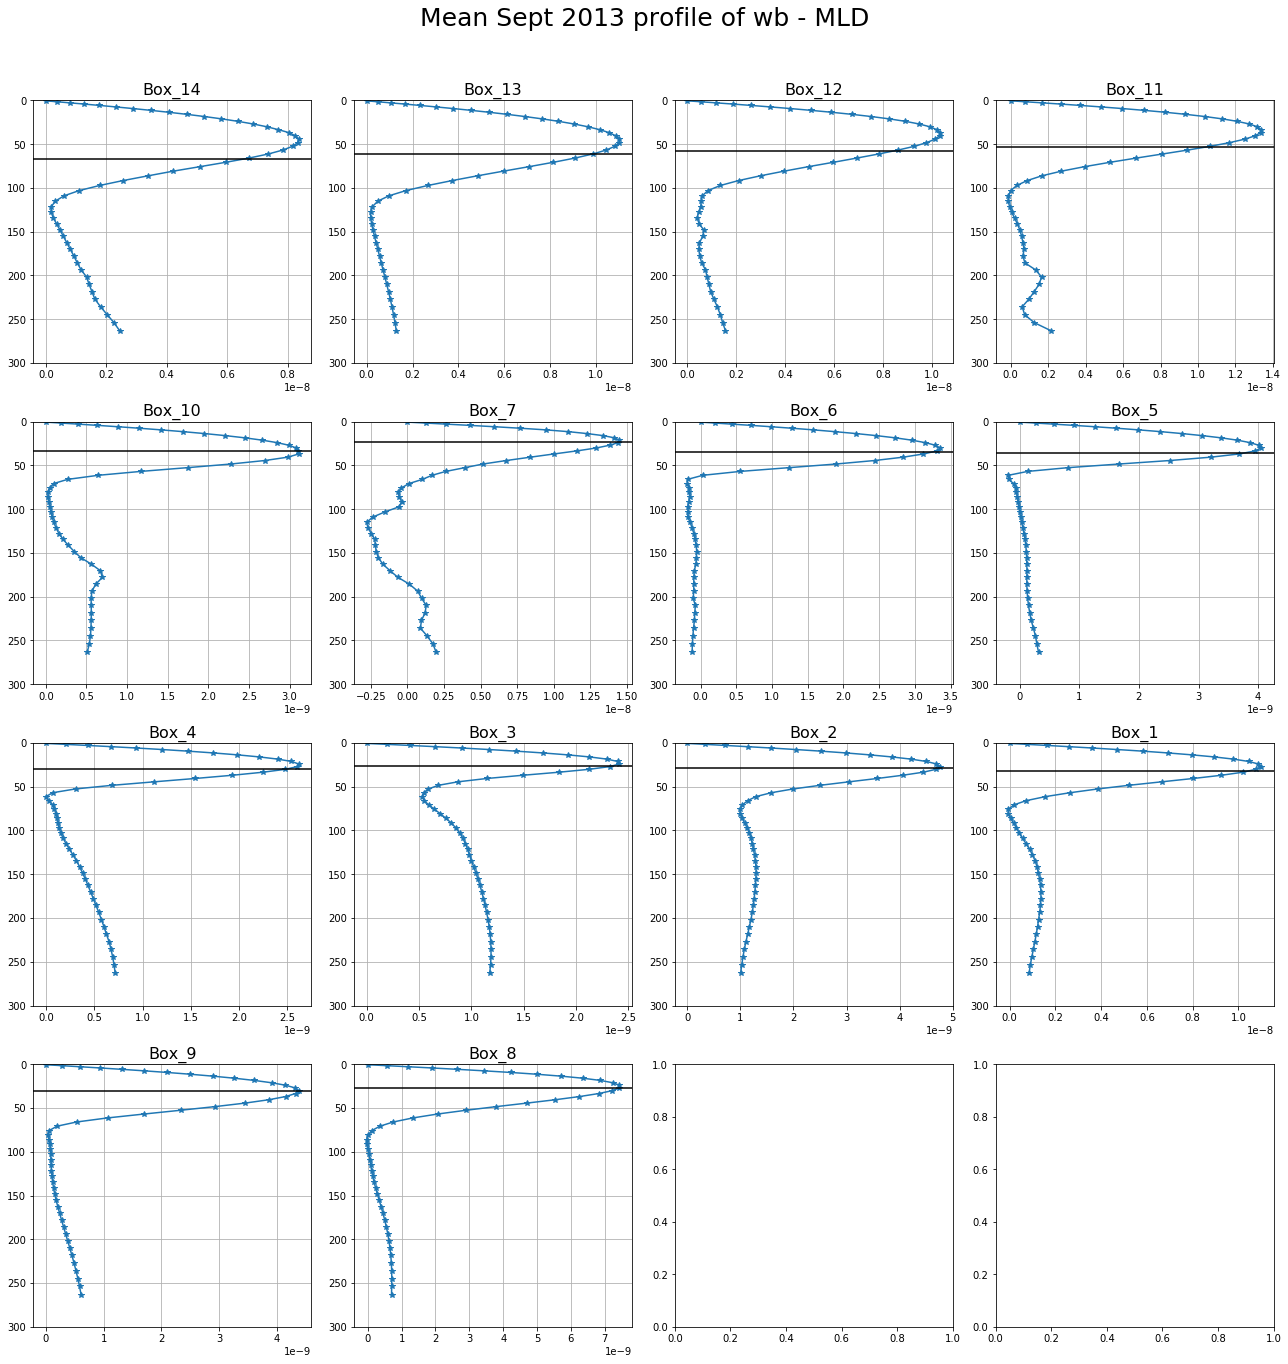

In [21]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Mean Sept 2013 profile of wb - MLD'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(np.nanmean(wb_box_sept[k,:,:],0),dep_sept,'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(300,0)
    axs[i].axhline(y=np.nanmean(mld_box_sept[k,:]),color='k')
    i = i + 1
    fig.tight_layout()
    
plt.savefig("NATL60_wb_profiles_sept13_surf_from_boxes.png")

In [24]:
global boxes
_Ann_wb_arr = []

for box in boxes:
    name=box.name
    print name
    nb=name[4:]
    march_wbuoyfiles = sorted(glob.glob(database + 'filt-3D/NATL60box'+nb+'-CJM165_y2013m03d*.1d_wbuoy_filt-n80-f0.0125.nc'))
    _wb_arr=[]
    for i in range(len(march_wbuoyfiles)): 
        wbuoy = xr.open_dataset(march_wbuoyfiles[i])['wbuoy']
        truc=np.nanmean(wbuoy,axis=3)
        trucb=np.nanmean(truc, axis=2)
        avg_wb_box = np.squeeze(trucb)
        _wb_arr.append(avg_wb_box)
    wb_arr = np.array(_wb_arr)
    _Ann_wb_arr.append(wb_arr)
wb_box_march = np.array(_Ann_wb_arr)

Box_14
Box_13
Box_12
Box_11
Box_10
Box_7
Box_6
Box_5
Box_4
Box_3
Box_2
Box_1
Box_9
Box_8


In [17]:
# test one box
box=boxes[12]
name=box.name
nb=name[4:]
march_wbuoyfiles = sorted(glob.glob(database + 'filt-3D/NATL60box'+nb+'-CJM165_y2013m03d*.1d_wbuoy_filt-n80-f0.0125.nc'))
_Ann_wb_arr = []
for i in range(len(march_wbuoyfiles)): 
    print march_wbuoyfiles[i]
    wbuoy = xr.open_dataset(march_wbuoyfiles[i])['wbuoy']
    truc=np.nanmean(wbuoy,axis=3)
    trucb=np.nanmean(truc, axis=2)
    avg_wb_box = np.squeeze(trucb)
    wb_arr = np.array(avg_wb_box)
    _Ann_wb_arr.append(wb_arr)
Ann_wb_arr = np.array(_Ann_wb_arr)
print Ann_wb_arr.shape

/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60box9-CJM165_y2013m03d01.1d_wbuoy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60box9-CJM165_y2013m03d02.1d_wbuoy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60box9-CJM165_y2013m03d03.1d_wbuoy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60box9-CJM165_y2013m03d04.1d_wbuoy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60box9-CJM165_y2013m03d05.1d_wbuoy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60box9-CJM165_y2013m03d06.1d_wbuoy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60box9-CJM165_y2013m03d07.1d_wbuoy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60box9-CJM165_y2013m03d08.1d_wbuoy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-

In [ ]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Mean September 2013 profile of wb - MLD'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(np.nanmean(wb_boxes_sept[:,k,:],0),dep,'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(300,0)
    axs[i].axhline(y=np.nanmean(mld_boxes_sept[:,k]),color='k')
    i = i + 1
    fig.tight_layout()
    
plt.savefig("NATL60_wb_profiles_sept13.png")